In [1]:
import sys
import numpy as np
import matplotlib.pyplot as pyp
import xarray as xr
import importlib

In [2]:
sys.path.append("../..")

In [3]:
import wavetracer as trace

## Reloading

In [20]:
importlib.reload(trace.core)
importlib.reload(trace)
importlib.reload(trace.excursion_vectors.second_order_approx)

<module 'wavetracer.excursion_vectors.second_order_approx' from '/home/colin_beyers/wavetracer/examples/../../wavetracer/excursion_vectors/second_order_approx.py'>

## Testing Parameters

In [5]:
t_testing   = np.linspace(0,100,10000)
lam_testing = 100
a_testing   = 1
H_testing   = 1000

In [6]:
k_testing       = trace.k_from_lam(lam_testing)
regime_testing  = trace.categorize_wave_regime(k_testing, H_testing)
omega_testing   = trace.wave_disp_relation(k_testing, H_testing, regime_testing)

In [7]:
params_testing = {
    'a': a_testing,           # Wave amplitude
    'k': k_testing,           # Water depth
    'H': H_testing,           # Wavenumber
    'omega': omega_testing,   # Angular frequency
    'order': 'second',   # Approximation order
    'wave_regime': regime_testing  # Wave regime
}

## Testing 1 Particle

In [8]:
x_0 = np.array([0]) # function expects numpy arrays
z_0 = np.array([0])

Note: this is not a forward facing fuction.

In [9]:
xp, zp = trace.compute_trajectory(x_0, z_0, t_testing, **params_testing)

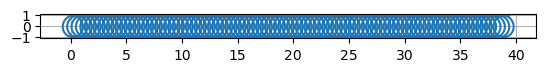

In [10]:
fig, ax = pyp.subplots()

pyp.plot(xp,zp)
ax.set_aspect("equal")
ax.grid()

## Trying Multiple Particles

In [40]:
def random_mean_pos(N, x_start, x_end, H, a, k):
    x_0 = np.random.uniform(x_start, x_end, N)
    z_0 = np.random.uniform(-H, 0, N) #a*np.cos(k*x_0))

    return x_0, z_0

First build a dataset

In [42]:
x_0, z_0 = random_mean_pos(N=100, x_start=0, x_end=10, H=5, a=a_testing, k=k_testing)

In [43]:
ds = trace.build_dataset(x_0, z_0, t_testing)

Visialize their intial positions

In [44]:
x_space = np.linspace(0,10,32)

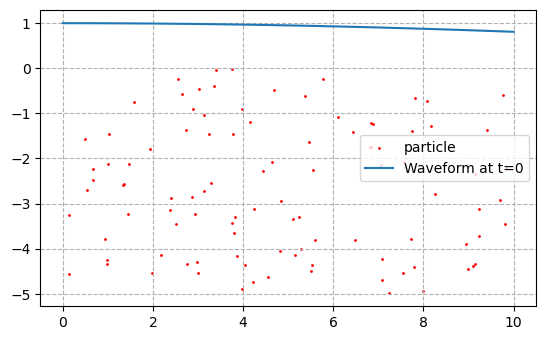

In [45]:
fig, ax = pyp.subplots()

pyp.scatter(ds.x_0, ds.z_0, label='particle', color='red', s=1)
pyp.plot(x_space, a_testing*np.cos(k_testing*x_space), label='Waveform at t=0')

pyp.legend()
ax.set_aspect("equal")
ax.grid(linestyle='--')

Now find their trajectories

In [46]:
ds = trace.compute_trajectories(ds, **params_testing)

Now plot their trajectories

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


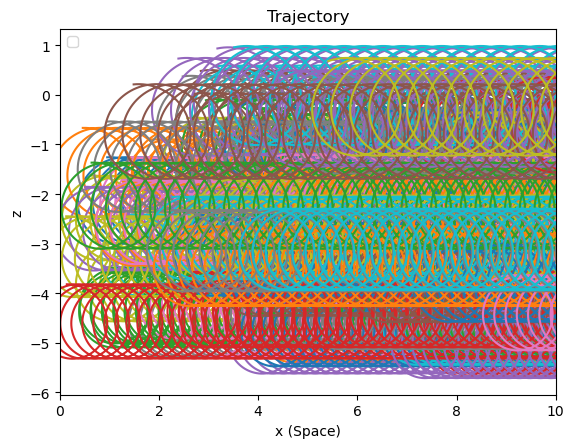

In [47]:
# Create figure and axes
fig, ax = pyp.subplots()

for particle in ds.particle:
    traj = ds.isel(particle=particle)
    ax.plot(traj.x_p, traj.z_p)

ax.set_xlim(0,10)
ax.set_aspect("equal")  # Use set_aspect instead of axis("equal")

# Add labels and legend
ax.set_xlabel("x (Space)")
ax.set_ylabel("z")
ax.legend()
ax.set_title("Trajectory")

# Show plot
pyp.show()

At some time, with the waveform

In [52]:
time = 150

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


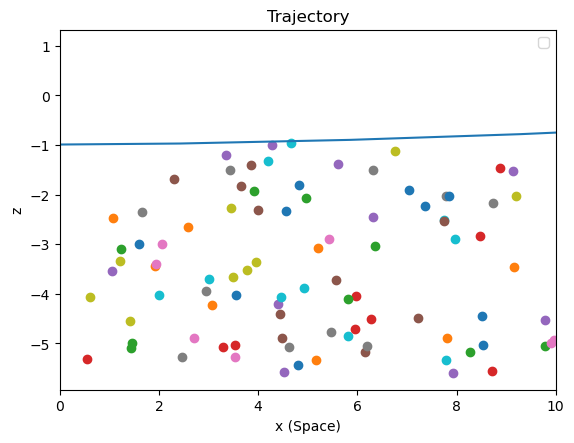

In [53]:
# Create figure and axes
fig, ax = pyp.subplots()

for particle in ds.particle:
    point = ds.isel(particle=particle, time=time)
    ax.scatter(point.x_p, point.z_p)

ax.plot(ds.x_eta, ds.isel(time=time).eta)

ax.set_xlim(0,10)
ax.set_aspect("equal")

# Add labels and legend
ax.set_xlabel("x (Space)")
ax.set_ylabel("z")
ax.legend()
ax.set_title("Trajectory")

# Show plot
pyp.show()

In [139]:
# Step 1: Generate N random x_0 values between x_start and x_end
x_0 = np.sort(np.random.uniform(0, 10, 250))

In [140]:
z_0 = np.random.uniform(-10, 1*np.cos(k*x_0))

In [141]:
ds_100 = wavetracer.core.build_dataset(x_0, z_0, t, grid=False)

In [142]:
eta_t0 = np.cos(k*np.linspace(0,20,11))

In [161]:
n = 165

In [172]:
ds_100_filtered = ds_100.where(ds_100['z_0'] > 0.79, drop=True)

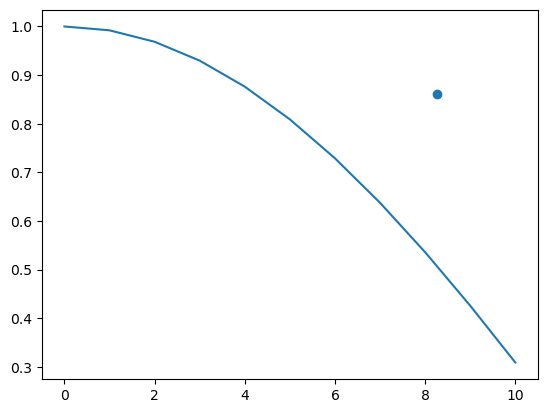

In [175]:
pyp.scatter(ds_100_filtered.isel(particle=4).x_0, ds_100_filtered.isel(particle=4).z_0)
pyp.plot(eta_t0)

<xarray.DataArray 'x_0' ()>
array(8.26447717)
Coordinates:
    particle  int64 207

In [177]:
1*np.cos(k*ds_100_filtered.isel(particle=4).x_0)

<xarray.DataArray 'x_0' ()>
array(0.86818047)
Coordinates:
    particle  int64 207